<center>


<img src="https://habrastorage.org/webt/jq/gc/r5/jqgcr5azmatev6zvgufn8xftehy.png">
    
#  **II Escuela de Verano en Física Computacional**

##Autores: [Ricardo Quispe M.](https://github.com/RcrdPhysics)
##Institución: Universidad Nacional Mayor de San Marcos 
##Correo: ricardo.quispe5@unmsm.edu.pe
    
Este material está sujeto a los términos y condiciones de la licencia [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/). Se permite el uso gratuito para cualquier propósito no comercial.

*También puede consultar la última versión de este notebook en nuestro [repositorio](https://github.com/PCPUNMSM) y los videos de clase [en nuestro canal de Youtube](https://www.youtube.com/channel/UCze8vzQLcplutz0nWDNjFCA).*
    

# <center> Sesión 8. Dinámica Molecular
<p align="center">
  <img src="https://www.creative-proteomics.com/images/Molecular-Dynamics-Simulation-Service.jpg"  width=35% />
</p>

## Outline

1. Dinámica Molecular 1D
2. Dinámica Molecular 2D
3. Dinámica Molecular 3D





## 1. Introducción



La dinámica molecular (DM) es una técnica de simulación por computadora en la que se permite que átomos y moléculas interactúen por un período, permitiendo una visualización del movimiento de las partículas. Esta técnica se concibió dentro de la física teórica, y ahora se usa ampliamente en el campo de la biofísica y la ciencia de materiales. Su campo de aplicación va desde superficies catalíticas hasta sistemas biológicos como las proteínas. Si bien los experimentos de cristalografía de rayos X permiten tomar "fotografías estáticas" y la técnica de RMN ofrecen indicios del movimiento molecular, ningún experimento es capaz de acceder a todas las escalas de tiempo involucradas. Resulta tentador, aunque no es enteramente correcto, describir a la DM como un "microscopio virtual" con alta resolución espacial y temporal.

En la actualidad existen varios programas capaces de llevar a cabo las simulaciones de DM, y a su vez existen varios campos de fuerza, que en general pueden utilizarse con diversos programas. LAMMPS, OpenMM, CHARMM, AMBER, NAMD y GROMACS son algunos de los paquetes más populares.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from copy import *

%matplotlib notebook
#%matplotlib inline
np.random.seed(42)

plt.rcParams["figure.figsize"] = (5,5)

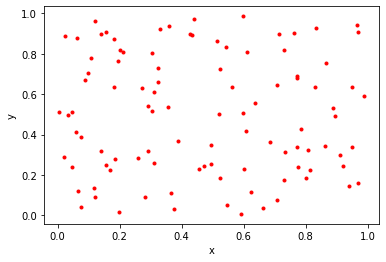

In [ ]:
x = np.random.rand(100)
y = np.random.rand(100)
%matplotlib inline
plt.figure()
plt.plot(x,y,'r.')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## 2. Partícula clásica en una caja bidimensional

Suponga que desea simular el movimiento de una partícula en una caja bidimensional. Para ello utilizaremos las leyes de Newton para integrar su movimiento. La dinámica de la misma dependerá de atributos de la misma, como ser la masa de la misma y de parámetros de la caja, como ser sus dimensiones. 

A su vez, para poder determinar las posiciones en función del tiempo deberemos contar con la posición inicial y la velocidad inicial. Podemos saber donde se encontrará la misma integrando las posición de la misma un diferencial de tiempo posterior.

Defina las siguientes variables: 

1. Tamaño del lado de la caja (L): 10 m
2. masa de la partícula (m): 1.0 kg
3. Posición inicial (x0,y0): (aleatorio, aleatorio) (m, m)
4. Velocidad inicial (vx0, vy0): (aleatorio, aleatorio) (m/s, m/s)
5. diferencial de tiempo (dt): 0.1 (s)

Para la posición tenga en cuenta el tamaño de la caja. Acote la velocidad a no más de +1 o -1 (m/s)

In [ ]:
L = 10.0
m = 1.0
V = 5.0
X0 = np.random.rand(1,2)*L - L/2.0
V0 = 2.0*V*(np.random.rand(1,2)-0.5)
dt = 0.1

Usando las leyes de Newton podemos escribir:

$\frac{F}{m} = \frac{d^2x}{dt^2} = a$

La velocidad de la particula a tiempo $t$ puede obtenerse sabiendo la aceleración:

$ v\left(t\right) = v_0 + at$ 

Integrando esta última ecuación, podemos obtener la posición:

$ x\left(t\right) = x_0 + vt $ 

Suponiendo que no hay fuerzas ejerciéndose sobre la partícula, escriba una función (Xt) que devuelva la posición de una partícula en un tiempo (dt) posterior en función de la velocidad inicial (V0):

In [ ]:
def Xt(X0,V0,dt):
    X = X0 + V0*dt
    return X

Chequee que la función funciona correctamente. Por ejemplo, vea que si $x_0$ = 10 m, $v_0$ = 1 m/s y dt = 1 s, la posición final es 11 m. Luego, utilice la función generada para mover la partícula 100 pasos:

In [ ]:
Xt(10,1,1)

11

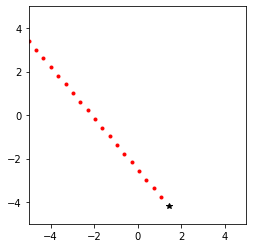

In [ ]:
%matplotlib inline

#Crea un objeto figura llamado fig
fig = plt.figure()

#Crea un eje (ax1) en la figura
ax1 = fig.add_subplot(1,1,1)

#Crea un plot en el eje ax1. Dibuja la posición inicial de la partícula como una estrella negra
ax1.plot(X0[:,0],X0[:,1],'k*')

nsteps = 100

#un bucle de nsetps pases que hace lo que está indentado
for i in range(nsteps):
    
    #Calcula la posición en función de x0, v0 y dt
    X = Xt(X0,V0,dt)
    
    #Dibuja la posición actual de la partícula como un punto rojo
    ax1.plot(X[:,0],X[:,1],'r.')
    
    #Ajusta el aspecto de los ejes para que sean simétricos
    ax1.axis('equal')
    ax1.set_aspect('equal', 'box')
    
    #Setea los limites de la figura
    ax1.set_xlim([-L/2,L/2])
    ax1.set_ylim([-L/2,L/2])
    
    #Actualiza la figura
    fig.canvas.draw()
    
    #Actualiza la posición. La posición calculada se convierte en la
    #posición inicial del próximo paso
    X0 = X

La función anterior mueve la partícula según la velocidad de la misma y la posición inicial. Si la misma estuviese en una caja con paredes rígidas, al chocar debería cambiar de dirección. Reescribamos la ecuación que integra el movimiento teniendo cuenta que al llegar a la pared, choca y cambia direccion. Una posibilidad es asumir choques perfectamente elásticos. Podemos pensar que si al integrar la posición, la misma está por fuera de la caja, debemos mover la partícula adentro y cambiarle el signo a la velocidad que traía. Complete el código a continuación:

In [ ]:
def Xt2(X0,V0,dt,L):
    
    #X es un vector de tamaño 2.
    #X[0] es la posición en la coordenada X
    #X[1] es la posición en la coordenada Y
    
    #Nueva posición en función de X0, V0 y dt
    X = X0 + V0*dt
    
    #Dado que la aceleración es 0.0, la velocidad es siempre la misma
    V = V0
    
    #Que pasa si la partícula se fue de la caja en la dimensión x? 
    #La caja está centrada en 0, por lo que va de -L/2 a L/2
    
    #Si la posición en la coordenada X es mayor a L/2, quiere decir que está 
    #fuera de la caja
    if X[0] > L/2:
        #Si está fuera, entonces el excedente de la posición respecto a la pared (X[0] - L/2)
        #hay que restarlo a la posición de la pared: nueva X[0] = L/2 - (X[0] - L/2) = X[0] = L - X[0]
        X[0] = L - X[0]
        #Si la partícula rebotó en la pared, entonces la dirección de la velocidad cambia!
        V[0] = -V[0]
    elif X[0] < -L/2:
        X[0] = -L - X[0]
        V[0] = -V[0]
    
    #Que pasa si la partícula se fue de la caja en la dimensión y?
    if X[1] > L/2:
        X[1] = L - X[1]
        V[1] = -V[1]
    elif X[1] < -L/2:
        X[1] = -L - X[1]
        V[1] = -V[1]   
        
    #Ahora debemos devolver tanto X como V, para poder saber la dirección de la partícula
    return X, V

Testeemos que la función Xt2 hace lo que pedimos que haga. Complete el código a continuación para que la partícula se mueva 500 pasos con un dt de 0.1.

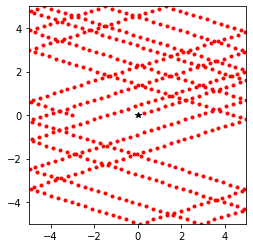

In [ ]:
#Inicializamos la partícula en la posición (0.0,0.0) con velocidad (3.14,1.0) y un dt = 0.1
X0 = np.array([0.0,0.0])
V0 = np.array([3.14,1.0])
dt = 0.1

nsteps = 500

fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
ax1.plot(X0[0],X0[1],'k*')
fig.show()
fig.canvas.draw()

for i in range(nsteps):
    X, V = Xt2(X0,V0,dt,L)
    ax1.plot(X[0],X[1],'r.')
    ax1.axis('equal')
    ax1.set_aspect('equal', 'box')
    ax1.set_xlim([-L/2,L/2])
    ax1.set_ylim([-L/2,L/2])
    fig.canvas.draw()
    
    #Actualizo X y V
    X0 = X
    V0 = V

El algoritmo propuesto para mover la partícula en la caja no permite poner cualquier valor de dt. Por ejemplo, para las condiciones de V0 y L anteriores, un dt = 10 genera problemas (la partícula se va de la caja!). Chequéelo. 
En este caso ¿De qué depende el máximo dt que puede utilizar antes de que su sistema explote? Escríbalo en función de L y V0

## 3. N partículas no interactuantes en una caja bidimensional

Ahora que ya somos capaces de simular una partícula chocando contra las paredes de una caja bidimensional, podemos extenderlo fácilmente a varias partículas que no interactúen. Para ello, simplemente reutilizamos el código, generando coordenadas iniciales y velocidades para dos partículas. Por ejemplo, si queremos simular dos partículas, necesitamos coordenas iniciales y velocidades para las dos:

In [ ]:
#N es el número de partículas
N = 2

#X0 son las posiciones inciales. Es una matriz de 2 x 2 (2 partículas x 2 coordenadss).
#Cada partícula es una nueva fila
X0 = np.random.rand(N,2)*L - L/2.0
V = 5.0
V0 = 2.0*V*(np.random.rand(N,2)-0.5)

print('X0')
print(X0)
print('V0')
print(V0)

X0
[[ 1.0642906  -4.90802948]
 [-3.98528457  1.63501769]]
V0
[[-4.94938416 -3.39191949]
 [ 0.48733789  1.91895198]]


Para que el algoritmo de integración de posición funcione con varias partículas, lo reescribimos en Xt3. Si bien la integración puede hacerse fácilmente sumando las matrices de X0 y V0dt (ambas tienen las mismas dimensiones!), con el fin de testear si cada partícula está dentro o fuera de la caja y modificar su posición y velocidad en consecuencia lo hacemos mediante un ciclo sobre el número de partículas (no es estrictamente necesario hacerlo así, pero vamos a hacerlo así para ilustrar lo que está pasando). Eso quiere decir que el algoritmo es lo suficientemente general como para simular N partículas no interactuantes!

In [ ]:
def Xt3(X0,V0,dt,L,N):
    
    #Nueva posición, misma velocidad de siempre
    X = X0 + V0*dt
    V = V0
    
    #Para cada partícula, chequeamos si choca con la pared
    for i in range(N):
        if X[i,0] > L/2:
            X[i,0] = L - X[i,0]
            V[i,0] = -V[i,0]
        elif X[i,0] < -L/2:
            X[i,0] = -L - X[i,0]
            V[i,0] = -V[i,0]
    
        if X[i,1] > L/2:
            X[i,1] = L - X[i,1]
            V[i,1] = -V[i,1]
        elif X[i,1] < -L/2:
            X[i,1] = -L - X[i,1]
            V[i,1] = -V[i,1]   
    return X, V

Testeemos el algoritmo para muchas N = 10 partículas. Simule el sistema durante 500 pasos, una caja de lado 10, un dt = 0.01

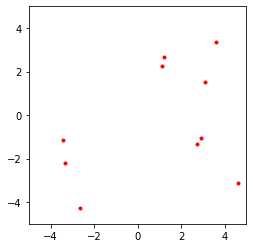

In [ ]:
nsteps = 500
N = 10
V = 5
L = 10
dt = 0.01

#Condiciones iniciales
X0 = np.random.rand(N,2)*L - L/2.0
V0 = 2.0*V*(np.random.rand(N,2)-0.5)

fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
ax1.plot(X0[:,0],X0[:,1],'k*')
fig.show()
fig.canvas.draw()

for i in range(nsteps):
    #Calculo posiciones y velocidades
    X, V = Xt3(X0,V0,dt,L,N)
    
    #Actualizo gráfico
    ax1.clear()
    ax1.plot(X[:,0],X[:,1],'r.')
    ax1.axis('equal')
    ax1.set_aspect('equal', 'box')
    ax1.set_xlim([-L/2,L/2])
    ax1.set_ylim([-L/2,L/2])
    fig.canvas.draw()
    
    #Las nuevas posiciones pasan a ser las posiciones iniciales del próximo paso
    #Idem para las velocidades
    X0 = X
    V0 = V

## 4. Potencial Armónico

¿Cómo podemos agregar la interacción entre las partículas? Podemos hacerlo de muchas maneras distintas. La interacción entre las mismas va a depender del potencial entre ellas. Por ejemplo, podríamos proponer que entre dos partículas, la energía potencial dependiera del cuadrado de la distancia:


<center>
$U(r) = \frac{k}{2} \left(r - r_0 \right)^2 $
</center>

Este potencial es el llamado armónico y es el modelo para un resorte a estiramientos pequeños y es usado, por ejemplo, para modelar enlaces en moléculas. 

Construya una función pot_arm, que dada la constante del resorte (k), la distancia de equilibrio (r0) y la distancia entre las partículas devuelva la energía del sistema:

In [ ]:
def pot_arm(k,r,r0):
    return 0.5*k*(r-r0)**2

Construya un gráfico que muestre la energía potencial del sistema en función de la distancia de las dos partículas:

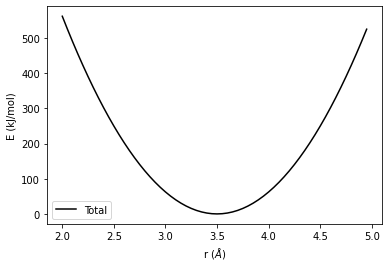

In [ ]:
k = 500
r0 = 3.5

r = np.arange(2.0,5.0,0.05)
total = pot_arm(k,r,r0)
fig = plt.figure()
plt.plot(r,total,'k',label = 'Total')
plt.xlabel('r ($\AA$)')
plt.ylabel('E (kJ/mol)')
plt.legend()
plt.show()

Para poder utilzar este potencial en una simulación, necesitamos calcular la fuerza que experimenta cada partícula en función de la posición. Eso significa que en vez de la energía potencial, necesitamos la fuerza. La fuerza y la energía potencial se relacionan a través de la siguiente igualdad:

$F_x = -\frac{dU}{dx}$

Escriba una función para calcular la fuerza entre dos partículas sometidas a un potencial armónico. Complete la función propuesta de forma que dada la constante del resorte, la distancia de equilibrio y la posición de las partículas, devuelva la fuerza que siente cada partícula.

In [ ]:
#Calculo de fuerza usando un potencial armonico
def force_arm(N,k,X,r0):
    
    #Inicializo la Energia y las fueras a 0.0
    Epot = 0.0
    F = np.zeros(X.shape)
    
    #Me fijo para todas las combinaciones de partículas
    #Evitando contando dos veces cada par y la interaccion sobre si misma
    for i in range(N-1):
        for j in range(i+1,N):
            rx = X[j,0] - X[i,0]
            ry = X[j,1] - X[i,1]
            r = np.sqrt(rx**2 +ry**2)
            fx = k*(r-r0)*rx/r
            fy = k*(r-r0)*ry/r
            
            Epot = Epot + 0.5*k*(r-r0)**2
    
            F[i,0] = F[i,0] + fx
            F[j,0] = F[j,0] - fx
            F[i,1] = F[i,1] + fy
            F[j,1] = F[j,1] - fy
    
    return F, Epot

Ahora podemos utilizar este potencial para testear la dinámica de dos partículas en una caja bidimensional. A diferencia de lo que hicimos hasta ahora, para actualizar las posiciones utilizaremos las fuerzas. Una de las formas de hacer esto es mediante el algoritmo de Verlet. Para ello, las nuevas posiciones se calculan de la siguiente forma:

$X_{t+1} = 2X_t - X_{t-1} + F_t \Delta t^2 + \mathcal{O}\left(\Delta t^4\right)$

En otras palabras, la nueva posición depende de la posición actual, la posición anterior y la fuerza que experimenta la partícula. Interesantemente, la posición no depende de la velocidad, por lo que en principio no es necesario computarla. Sin embargo, dado que la velocidad de las partículas da cuenta de la energía cinética del sistema, es útil hacerlo. En este caso, se puede hacer de la siguiente manera:

$V_{t+1} = \frac{X_{t+1} - X_{t-1}}{2 \Delta t}$

Nuevamente, dado que tenemos a nuestras partículas dentro de una caja, deberemos testear si las nuevas posiciones deben ser modificadas o no al chocar con las paredes. Usando el script a continuación, estudie el efecto de la constante de fuerza y la posición de equilibrio en la dinámica. Para su comodidad, además de la dinámica puede observar la evolución de la energía cinética, potencial y total del sistema. Para comenzar, analice el sistema para dos partículas (por ejemplo, N = 2; L = 3.0; V = 0.5; k = 25; r0 = 1; dt = 0.01). Cuando finalice, repita los mismos parámetros pero usando N = 49 partículas y k = 1. Por último, descomente la sección que dice "DESCOMENTAME!" (para ello, comente las """ al principio y al final del bloque), y vuelva a ejecutar el código. A diferencia del último caso, las 49 partículas estarán dispuestas homogéneamente en el centro de una caja de 10x10.

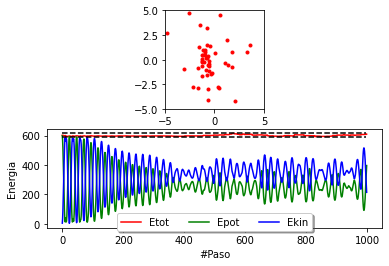

In [ ]:
np.random.seed(42)

N = 2
L = 3.0
X = np.random.rand(N,2)*L - L/2.0
V = 0.5
k = 25
r0 = 1
dt = 0.01
nsteps = 1000
#L = 10
# DESCOMENTAME! #############################
#"""
N = 49
L = 7.0
X = L*np.array([[ 0.07142857,  0.5       ],
       [ 0.21428571,  0.07142857],
       [ 0.92857143,  0.92857143],
       [ 0.35714286,  0.21428571],
       [ 0.07142857,  0.92857143],
       [ 0.07142857,  0.35714286],
       [ 0.21428571,  0.92857143],
       [ 0.92857143,  0.21428571],
       [ 0.35714286,  0.64285714],
       [ 0.35714286,  0.92857143],
       [ 0.21428571,  0.64285714],

       [ 0.92857143,  0.07142857],
       [ 0.78571429,  0.21428571],
       [ 0.92857143,  0.35714286],
       [ 0.64285714,  0.5       ],
       [ 0.5       ,  0.64285714],
       [ 0.21428571,  0.5       ],
       [ 0.92857143,  0.5       ],
       [ 0.35714286,  0.07142857],
       [ 0.78571429,  0.64285714],
       [ 0.64285714,  0.78571429],
       [ 0.5       ,  0.07142857],
       [ 0.07142857,  0.07142857],
       [ 0.64285714,  0.35714286],
       [ 0.5       ,  0.21428571],
       [ 0.78571429,  0.35714286],
       [ 0.78571429,  0.5       ],
       [ 0.92857143,  0.64285714],
       [ 0.92857143,  0.78571429],
       [ 0.64285714,  0.21428571],
       [ 0.5       ,  0.35714286],
       [ 0.21428571,  0.35714286],
       [ 0.07142857,  0.21428571],
       [ 0.5       ,  0.5       ],
       [ 0.07142857,  0.64285714],
       [ 0.35714286,  0.5       ],
       [ 0.07142857,  0.78571429],
       [ 0.64285714,  0.92857143],
       [ 0.78571429,  0.92857143],
       [ 0.64285714,  0.07142857],
       [ 0.5       ,  0.92857143],
       [ 0.21428571,  0.78571429],
       [ 0.35714286,  0.78571429],
       [ 0.64285714,  0.64285714],
       [ 0.21428571,  0.21428571],
       [ 0.35714286,  0.35714286],
       [ 0.5       ,  0.78571429],
       [ 0.78571429,  0.07142857],
       [ 0.78571429,  0.78571429]]) - L/2.0
V = 1
k = 5.0
r0 = 1.0
dt = 0.01
L = 10 
#"""
#######################################################

#Velocidad inicial
V0 = 2.0*V*(np.random.rand(N,2)-0.5)

#Calculo la energia cinetica y la guardo en una lista
Ekin = 0.5*sum(np.sum(V0**2, axis = 1))
Ekin_list = [Ekin/N]

#Construyo una posición en t-1 usando la velocidad
X0 = X - V0*dt

#Fuerza inicial y energia potencial inicial
F, Epot = force_arm(N, k, X, r0)
Epot_list = [Epot/N]

def integrate(N,X0,X,F,L,dt):

    #inicializo energia 
    Ekin = 0.0
    
    #Calculo la nueva posicion y la nueva velocidad de todas las particulas
    Xnew = 2.0*X - X0 + F*dt**2
    Vnew = (Xnew - X0)/(2.0*dt)
    
    #Para cada particula chequeo si choca con las paredes
    for i in range(N):
        if Xnew[i,0] > L/2:
            Xnew[i,0] = L - Xnew[i,0]
            Vnew[i,0] = -Vnew[i,0]           
            #Si choco, entonces muevo la posicion anterior de forma de mantener 
            #el modulo de la energia cinetica y conservar la energia
            X[i,0] = L - X[i,0]
            
        if Xnew[i,0] < -L/2:
            Xnew[i,0] = -L - Xnew[i,0]
            Vnew[i,0] = -Vnew[i,0]
            #Muevo para conservar la energia
            X[i,0] = -L - X[i,0]
    
        if Xnew[i,1] > L/2:
            Xnew[i,1] = L - Xnew[i,1]
            Vnew[i,1] = -Vnew[i,1]
            #Muevo para conservar la energia
            X[i,1] = L - X[i,1]
            
        if Xnew[i,1] < -L/2:
            Xnew[i,1] = -L - Xnew[i,1]
            Vnew[i,1] = -Vnew[i,1]   
            #Muevo para conservar la energia
            X[i,1] = -L - X[i,1]
        
        #Acumulo la energia cinetica de cada particula
        Ekin = Ekin + 0.5*(Vnew[i,0]**2 + Vnew[i,1]**2)
    return Xnew, X, Ekin

#Inicializo figura
fig = plt.figure()
ax1 = fig.add_subplot(2,1,1)
ax3 = fig.add_subplot(2,1,2)
fig.canvas.draw()

#calculo la energia total por particula.
Etot_list = [(Ekin + Epot)/N]
min_Etot = 1e6
max_Etot = 0.0

for i in range(nsteps):
    
    #Calculo la fuerza y la Epot
    F, Epot = force_arm(N,k,X,r0)
    
    #agrego la E potencial por particula a la lista
    Epot_list.append(Epot/N)
    
    #Integro posiciones y calculo la Ekin
    Xnew, X, Ekin = integrate(N,X0,X,F,L,dt)
    
    #agrego la E cinetica por particula a la lista
    Ekin_list.append(Ekin/N)
    
    #Actualizo posiciones
    X0 = copy(X)
    X = copy(Xnew)
    
    #grafico posiciones
    ax1.clear()
    ax1.plot(X[:,0],X[:,1],'r.')
    ax1.axis('equal')
    ax1.set_aspect('equal', 'box')
    ax1.set_xlim([-float(L/2),float(L/2)])
    ax1.set_ylim([-float(L/2),float(L/2)])
    
    #Calculo la Etot por particula
    Etot = Epot_list[-1] + Ekin_list[-1] 
    Etot_list.append(Etot)
    
    #Busco la menor y mayor energia total y las guardo en min_Etot y max_Etot
    min_Etot = min(min_Etot, Etot)
    max_Etot = max(max_Etot, Etot)
    
    #Grafico las energias del sistema
    ax3.clear()
    ax3.plot(Etot,'r')
    ax3.plot(np.array(Etot_list[1:]),'r',label = 'Etot')
    ax3.plot(np.array(Epot_list[1:]),'g',label = 'Epot')
    ax3.plot(np.array(Ekin_list[1:]),'b',label = 'Ekin')
    
    #Rango de la energia total
    ax3.plot(i*[min_Etot],'k--')
    ax3.plot(i*[max_Etot],'k--')
    
    ax3.set_ylabel('Energia')
    ax3.set_xlabel('#Paso')
    ax3.legend(loc='upper center', bbox_to_anchor=(0.5, 0.2),
          ncol=3, fancybox=True, shadow=True)
    fig.canvas.draw()


Dado que el potencial como está escrito es atractivo, las partículas deberían oscilar alrededor de la posición de equilibrio. ¿Qué pasaría si k = 0?¿Y si k < 0?

## 5. Condiciones periódicas de contorno

A diferencia de lo que hemos hecho hasta ahora, en vez de realizar simulaciones en una caja de dimensiones finitas en las que las partículas chocan, usaremos una caja infinita. Para esto, nos valdremos de una técnica conocida como Condiciones Periódicas de Contorno (Periodic Boundary Conditions en inglés). Esta técnica se basa en simular una caja finita rodeada por cajas similares en cada uno de sus límites. Si una partícula sale por uno de los lados, se coloca una partícula similar en el lado opuesto de la caja.

Cuando trabajamos con una caja finita en la que las partículas chocan contra las paredes, las partículas en las inmediaciones de las paredes tienen entornos distintos a las partículas en el seno de la caja. Al usar condiciones periódicas todas las partículas tienen entornos más parecidos, ya que cada partícula interactuará con partículas de su caja o con las imágenes más cercanas de cajas contiguas.

Antes de pasar a un potencial mas realista, incorporemos las condiciones periódicas al conjunto de partículas armónicas para entender su funcionamiento. A continuación el potencial armónico con PBC.

In [ ]:
#Calculo de fuerza usando un potencial armonico
def force_arm_PBC(N,k,X,r0,box):
    Epot = 0.0
    F = np.zeros(X.shape)
    #r_list = np.zeros(N*(N-1)/2)
    #w = 0
    for i in range(N-1):
        for j in range(i+1,N):
            rx = X[j,0] - X[i,0]
            ry = X[j,1] - X[i,1]
            
            
            #### PBC ########################################################## 
            #Corrijo la distancia, buscando la particula (o imagen) mas cercana
            rx = rx - box*np.rint(rx/box)
            ry = ry - box*np.rint(ry/box)
            ###################################################################
            
            r = np.sqrt(rx**2 +ry**2)
            #r_list[w] = r
            #w = w +1
            fx = k*(r-r0)*rx/r
            fy = k*(r-r0)*ry/r
            
            Epot = Epot +0.5*k*(r-r0)**2
    
            F[i,0] = F[i,0] + fx
            F[j,0] = F[j,0] -fx
            F[i,1] = F[i,1] + fy
            F[j,1] = F[j,1] -fy
    
    #return F, Epot, r_list
    return F, Epot

Con el fin de inicializar el sistema en condiciones más homogéneas para que relaje más rápida y felizmente, creamos una función que distribuye las partículas en la caja de forma simétrica, adicionandole una pequeña cantidad de aleatoriedad.

In [ ]:
def lattice_pos(npart,r):
    """
    Distribuye homogeneamente npart particulas en una celda
    de 1x1 entre 0 y 1, agregando un r/100% de aleatoriedad. 
    Devuelve un np.array de npart de posiciones x 2 coordenadas

    """

    #Calculo cantidad de celdas por lado
    n = int(np.ceil(np.sqrt(npart)))
    
    #calculo el centro de la celda
    nf = 1.0/float(n)
    
    #Calculo las posiciones de todas las celdas disponibles agregando un r% de randomizacion
    #r = 0.02
    celdas = [[i*nf +0.5*nf + r*np.random.rand(),j*nf + 0.5*nf+ r*np.random.rand()]
              for i in range(n) for j in range(n)]
    
    #Mezclo las posiciones de las celdas
    np.random.shuffle(celdas)
    
    X = np.array(celdas[0:npart])
    return X

Utilice el código a continuación para realizar una simulación de 49 partículas interactuando con potenciales armónicos en condiciones periódicas (utilice una caja de L = 7.0). Esta misma geometría es la que utilizó en el caso de los 49 osciladores armónicos en la caja. Observe la dinámica de las partículas y comparelos con lo que veía en la caja. 

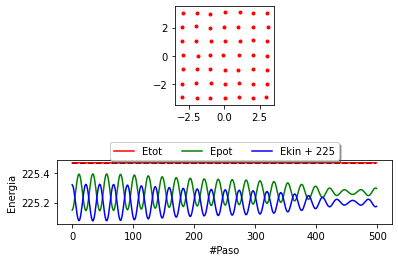

In [ ]:
np.random.seed(42)

N = 49
L = 7.0

#X = np.random.rand(N,2)*L - L/2.0
X = lattice_pos(N,0.01)*L - L/2.0

V = 1
k = 5.0
r0 = 1.0
dt = 0.01
nsteps = 500
#L = 20

V0 = 2.0*V*(np.random.rand(N,2)-0.5)

#Calculo la velocidad del centro de masa y se la resto para que el sistema no se mueva
V0 = V0 - np.tile(np.mean(V0, axis = 0),(N,1));

Ekin = 0.5*sum(np.sum(V0**2, axis = 1))
Ekin_list = [Ekin/N]

#Construyo una posición en t-1 usando la velocidad
X0 = X - V0*dt

#Fuerza inicial
#F, Epot, r = force_arm(N, k, X, r0)
F, Epot = force_arm_PBC(N, k, X, r0, L)
Epot_list = [Epot/N]
#r_list = [r]

def integrate(N,X0,X,F,L,dt):
    Ekin = 0.0
    #Xnew = 2.0*X - X0 + F*dt**2
    Xnew = np.zeros(X0.shape)
    Vnew = np.zeros(X0.shape)
    
    for i in range(N):
        Xnew[i,0] = 2.0*X[i,0] - X0[i,0] + F[i,0]*dt**2
        rx = X[i,0] - X0[i,0]
        rx = rx - L*np.rint(rx/L)
        v1 = rx/dt
        rx = Xnew[i,0] - X[i,0]
        rx = rx - L*np.rint(rx/L)
        v2 = rx/dt 
        Vnew[i,0] = 0.5*(v1+v2)
        
        if Xnew[i,0] > L/2:
            Xnew[i,0] = Xnew[i,0] - L
                  
        if Xnew[i,0] < -L/2:
            Xnew[i,0] = L + Xnew[i,0]
        
        Xnew[i,1] = 2.0*X[i,1] - X0[i,1] + F[i,1]*dt**2
        ry = X[i,1] - X0[i,1]
        ry = ry - L*np.rint(ry/L)
        v1 = ry/dt
        ry = Xnew[i,1] - X[i,1]
        ry = ry - L*np.rint(ry/L)
        v2 = ry/dt 
        Vnew[i,1] = 0.5*(v1+v2) 
        
        if Xnew[i,1] > L/2:
            Xnew[i,1] = Xnew[i,1] - L
            
        if Xnew[i,1] < -L/2:
            Xnew[i,1] = L + Xnew[i,1]
        
        Ekin = Ekin + 0.5*(Vnew[i,0]**2 + Vnew[i,1]**2)
    return Xnew, X, Ekin

fig = plt.figure()
ax1 = fig.add_subplot(2,1,1)
ax3 = fig.add_subplot(3,1,3)
ax1.plot(X0[:,0],X0[:,1],'k*')
fig.show()
fig.canvas.draw()

Etot_list = [(Ekin + Epot)/N]
min_Etot = 1e6
max_Etot = 0.0
for i in range(nsteps):
    
    #Calculo la fuerza y la Epot
    #F, Epot, r = force_arm(N,k,X,r0)
    F, Epot = force_arm_PBC(N, k, X, r0, L)

    Epot_list.append(Epot/N)
    
    #Integro posiciones y calculo la Ekin
    Xnew, X, Ekin = integrate(N,X0,X,F,L,dt)
    Ekin_list.append(Ekin/N)
    
    #Actualizo posiciones
    X0 = copy(X)
    X = copy(Xnew)
    
    #r_list.append(r)
    
    ax1.clear()
    ax1.plot(X[:,0],X[:,1],'r.')
    ax1.axis('equal')
    ax1.set_aspect('equal', 'box')
    ax1.set_xlim([-L/2,L/2])
    ax1.set_ylim([-L/2,L/2])
    
    #ax2.clear()
    #ax2.plot(r_list,'r')
    #ax2.plot(i*[r0],'k--')
    #ax2.set_ylabel('Distancia')
    #ax2.set_xlabel('#Paso')
    
    ax3.clear()
    Etot = (Ekin+Epot)/N
    Etot_list.append(Etot)
    min_Etot = min(min_Etot, Etot)
    max_Etot = max(max_Etot, Etot)
    ax3.plot(i*[min_Etot],'k--')
    ax3.plot(i*[max_Etot],'k--')
    ax3.plot(np.array(Etot_list[1:]),'r',label = 'Etot')
    ax3.plot((np.array(Epot_list[1:])),'g',label = 'Epot')
    ax3.plot(np.array(Ekin_list[1:])+225,'b',label = 'Ekin + 225')
    ax3.set_ylabel('Energia')
    ax3.set_xlabel('#Paso')
    ax3.legend(loc='upper center', bbox_to_anchor=(0.5, 1.35),
          ncol=3, fancybox=True, shadow=True)
    fig.canvas.draw()

## DM 1D

**Potencial de Lennard-Jones**

Un par de átomos o moléculas neutros están sujetos a dos fuerzas distintas en el límite de una gran separación y de una pequeña separación: una fuerza atractiva actúa a grandes distancias (fuerza de Van Der Waals, o fuerza de dispersión) y una fuerza repulsiva actuando a pequeñas distancias (el resultado de la sobreposición de los orbitales electrónicos, conocido como la repulsión de Pauli). El potencial de Lennard-Jones (también conocido como el potencial L-J, el potencial 6-12 o, con menor frecuencia, como el potencial 12-6) es un modelo matemático sencillo para representar este comportamiento.

El potencial L-J es de la forma:

$${\displaystyle V(r)=4\epsilon \left[\left({\frac {\sigma }{r}}\right)^{12}-\left({\frac {\sigma }{r}}\right)^{6}\right]}$$

donde:

*   ${\displaystyle \,\epsilon }$ es la profundidad del potencial.
*   ${\displaystyle \,\sigma }$ es la distancia (finita) en la que el potencial entre partículas es cero
*   $r$ es la distancia entre partículas.

Estos parámetros pueden ser ajustados para reproducir datos experimentales o pueden ser deducidos de resultados muy precisos de cálculos de química cuántica. 

La función que describe la fuerza a la que están sujetas las partículas es opuesta al gradiente del potencial arriba descrito:


$$ {\vec{F}}(r)=-{\vec {\nabla }}V(r)$$

$$-{\frac {dV(r)}{dr}}{\hat {r}}=4\epsilon \left((- 12)\,{\frac {{\sigma }^{12}}{{r}^{13}}}-(-6)\,{\frac {{\sigma }^{6}}{{r}^{7}}}\right){\hat {r}}$$

$$\vec{F}(r)=24 \epsilon \left(2\,{\frac {{\sigma }^{12}}{{r}^{13}}}-\,{\frac {{\sigma }^{6}}{{r}^{7}}}\right){\hat {r}}$$

La forma del término que describe la repulsión no tiene ninguna justificación teórica; la fuerza repulsiva debe depender exponencialmente de la distancia, pero el término de la fórmula de L-J es más conveniente debido a la facilidad y eficiencia de calcular $r^{12}$ como el cuadrado de $r^6$. Su origen físico está relacionado al principio de exclusión de Pauli: cuando dos nubes electrónicas circulando los átomos se empiezan a sobreponer, la energía del sistema aumenta abruptamente. El término $r^{- 12} $  es la repulsión debida al principio de exclusión de Pauli y $r^{- 6}$ término es la atracción debida a la interacción dipolo-dipolo (van der Waals) entre átomos no polares.


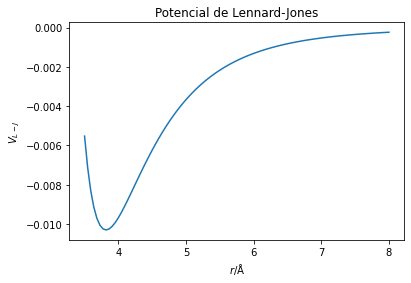

In [ ]:

def lj_potential(r, epsilon, sigma):
    """
    Lennard-Jones force 
    to calculate the force of the interaction.

    Parameters
    ----------
    r: float
        Distancia entre dos partículas (Å)
    epsilon: float 
        Profundidad del potencial (eV)
    sigma: float 
        es la distancia (finita) en la que 
        el potencial entre partículas es cero (Å)
    
    Returns
    -------
    float
        Force of the van der Waals interaction (eV/Å)
    """
    return 4 * epsilon *( np.power(sigma, 12)/np.power(r, 12) 
        - np.power(sigma, 6)/np.power(r, 6))

def lj_force(r, epsilon, sigma):
    """
    Lennard-Jones force 
    to calculate the force of the interaction.

    Parameters
    ----------
    r: float
        Distancia entre dos partículas (Å)
    epsilon: float 
        Profundidad del potencial (eV)
    sigma: float 
        es la distancia (finita) en la que 
        el potencial entre partículas es cero (Å)
    
    Returns
    -------
    float
        Force of the van der Waals interaction (eV/Å)
    """
    return 24 * epsilon *( 2* np.power(sigma, 12)/np.power(r, 13) 
        - np.power(sigma, 6)/np.power(r, 7))
    
r = np.linspace(3.5, 8, 100)
#plt.plot(r, lj_force(r, 0.0103, 3.4))
plt.plot(r, lj_potential(r,0.0103, 3.4))
plt.xlabel('$r$/Å')
#plt.ylabel('$f$/eVÅ$^{-1}$')
plt.ylabel('$V_{L-J}$')
plt.title("Potencial de Lennard-Jones")
plt.show()

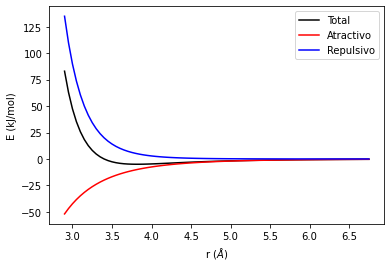

In [ ]:
def LJ(r,sigma,epsilon):
    repulsivo = 4*epsilon*(sigma/r)**12
    atractivo = -4*epsilon*(sigma/r)**6
    total = atractivo + repulsivo
    
    return total, atractivo, repulsivo

epsilon = 5
sigma = 3.4

r = np.arange(sigma - 0.5,2*sigma,0.05)
total, atractivo, repulsivo = LJ(r,sigma, epsilon)
fig = plt.figure()
plt.plot(r,total,'k',label = 'Total')
plt.plot(r,atractivo,'r',label = 'Atractivo')
plt.plot(r,repulsivo,'b',label = 'Repulsivo')
plt.xlabel('r ($\AA$)')
plt.ylabel('E (kJ/mol)')
plt.legend()

plt.show()

In [ ]:
import numpy as np
import pandas as pd
from scipy import spatial
import matplotlib.pyplot as plt
from ipywidgets import interact
%matplotlib inline

In [ ]:
def lennard_jones_potential(r, epsion=1.0, sigma=1.0):
    sigma12 = np.power(sigma, 12.0) 
    sigma6 = np.power(sigma, 6.0)
    return 4.0 * epsion * (sigma12 * np.power(r, -12.) - sigma6 * np.power(r, -6.))

def lennard_jones_force(r, epsilon=1.0, sigma=1.0):
    sigma13 = np.power(sigma, 12.0) 
    sigma7 = np.power(sigma, 6.0)
    return 24.0 * epsilon / sigma * (2.0 * sigma13 * np.power(r, -12.) - sigma7 * np.power(r, -6.)) 

def plot_lj_pot(r, epsilon=1.0, sigma=1.0):
    pot = lennard_jones_potential(r, epsilon, sigma)
    plt.plot(r, pot, lw=2, label='LJ potential')

def plot_lj_force(r, epsilon=1.0, sigma=1.0):
    force = lennard_jones_force(r, epsilon, sigma)
    plt.plot(r, force, lw=2, label='LJ force')

r = np.linspace(0.5, 2.5, 100)
def plot_lj(epsilon=1.0, sigma=1.0):
    fig = plt.figure(figsize=(10, 6))
    plot_lj_pot(r, epsilon=epsilon, sigma=sigma)
    plot_lj_force(r, epsilon=epsilon, sigma=sigma)
    plt.ylim([-4.0, 4.0])
    plt.axvline(sigma, linestyle=':', color='blue', label='V = 0')
    plt.axvline(np.power(2.0, 1./6.) * sigma, linestyle=':', color='red', label='$r^*$')
    plt.axhline(-epsilon, linestyle=':', color='orange', label='$V_\mathrm{min}$')
    plt.legend()
    plt.title('')
    plt.grid()    
    
# plot_lj_pot(r, 1.0, 1.0)
interact(plot_lj, epsilon=(0.1, 2.0), sigma=(0.1, 2.0));

interactive(children=(FloatSlider(value=1.0, description='epsilon', max=2.0, min=0.1), FloatSlider(value=1.0, …

Es importante que determinemos la fuerza en cada dirección para nuestra simulación. Esto se logra multiplicando por el vector unitario en esa dirección,

$$\mathbf{f}_x = f\hat{\mathbf{r}}_x\text{, where }\hat{\mathbf{r}}_x = \dfrac{r_x}{|\mathbf{r}|}$$


En la ecuación anterior,$r_x$ es la distancia entre las dos partículas en la dirección x y $|\mathbb{r}|$ es la magnitud del vector de distancia. Para simplificar, inicialmente solo consideraremos partículas que interactúan en un espacio unidimensional.

El siguiente código de Python muestra cómo determinar la aceleración en cada átomo de argón debido a cada uno de los otros átomos de argón. Es posible aumentar la eficiencia de este algoritmo aplicando la tercera ley de Newton, p. Ej. la fuerza sobre el átomo $i$ será igual y opuesto a la fuerza sobre el átomo $j$.

In [ ]:
mass_of_argon = 39.948 # amu

def get_accelerations(positions):
    """
    Calcula la aceleración de cada partícula como 
    resultado de cada una de las demás

    Parameters
    ----------
    positions: ndarray of floats
        The positions, in a single dimension, 
        for all of the particles (Å)
        
    Returns
    -------
    ndarray of floats
        The acceleration on each particle (eV/Åamu)
    """
    accel_x = np.zeros((positions.size, positions.size))
    for i in range(0, positions.size - 1):
        for j in range(i + 1, positions.size):
            r_x = positions[j] - positions[i]
            rmag = np.sqrt(r_x * r_x)
            force_scalar = lj_force(rmag, 0.0103, 3.4)
            force_x = force_scalar * r_x / rmag
            #De la segunda ley
            accel_x[i, j] = force_x / mass_of_argon #eV Å-1 amu-1
            # aplicando la tercera ley
            accel_x[j, i] = - force_x / mass_of_argon
    return np.sum(accel_x, axis=0)

pos=np.array([1, 5, 10])#np.linspace(1,10,10)
accel = get_accelerations(pos)
print('Acceleration on particle 0 = {:.3e} eV/Åamu'.format(
    accel[0]))
print('Acceleration on particle 1 = {:.3e} eV/Åamu'.format(
    accel[1]))
print('Acceleration on particle 2 = {:.3e} eV/Åamu'.format(
    accel[2]))

Acceleration on particle 0 = 1.453e-04 eV/Åamu
Acceleration on particle 1 = -4.519e-05 eV/Åamu
Acceleration on particle 2 = -1.002e-04 eV/Åamu


## Integración

Ahora que hemos visto cómo obtener la aceleración de nuestras partículas, podemos aplicar las **ecuaciones de movimiento de Newton** para sondear la trayectoria de las partículas,

$$\mathbf{x}_i(t + \Delta t) = \mathbf{x}_i(t) + \mathbf{v}_i(t)\Delta t + \dfrac{1}{2} \mathbf{a}_i(t)\Delta t^2$$

$$\mathbf{v}_i(t + \Delta t) = \mathbf{v}_i(t) + \dfrac{1}{2}\big[\mathbf{a}_i(t) + \mathbf{a}_i(t+\Delta t)\big]\Delta t,$$

dónde, $Δt$ es el paso de tiempo (cuánto se incrementa en el tiempo), $x_i$ es la posición de la partícula, $\mathbb{v_i}$ es la velocidad, y $\mathbb{a_i}$ la aceleración. Este par de ecuaciones se conoce como algoritmo de  Verlet, que se puede escribir como:



1.   Calcule la fuerza (y por lo tanto la aceleración) sobre la partícula
2.   Encuentra la posición de la partícula después de un paso de tiempo
3.   Calcule las nuevas fuerzas y aceleraciones.
4.   Determine una nueva velocidad para la partícula, basada en la aceleración promedio en las posiciones actual y nueva.
5.   Sobrescriba los antiguos valores de aceleración con los nuevos, $\mathbb{a}_i (t)=\mathbb{a}_i(t+\Delta t)$
6.   Repetir

Después de la relajación inicial de las partículas hasta el equilibrio, este proceso puede continuarse durante el tiempo que sea necesario para obtener estadísticas suficientes para la cantidad que le interesa.

El código de Python a continuación es un conjunto de dos funciones para las ecuaciones anteriores, que se aplicarán más adelante.

In [ ]:
def update_pos(x, v, a, dt):
    """
    Update the particle positions.
    
    Parameters
    ----------
    x: ndarray of floats
        The positions of the particles in a 
        single dimension (Å)
    v: ndarray of floats
        The velocities of the particles in a 
        single dimension (eVs/Åamu)
    a: ndarray of floats
        The accelerations of the particles in a 
        single dimension (eV/Åamu)
    dt: float
        The timestep length (s)
    
    Returns
    -------
    ndarray of floats:
        New positions of the particles in a 
        single dimension (Å)
    """
    return x + v * dt + 0.5 * a * dt * dt

def update_velo(v, a, a1, dt):
    """
    Actualice las velocidades de las partículas.
    
     Parámetros
     ----------
     v: ndarray de floats
         Las velocidades de las partículas en un
         dimensión única (eVs / Åuma)
     a: ndarray de floats
         Las aceleraciones de las partículas en un
         dimensión única en la anterior
         paso de tiempo (eV / Åuma)
     a1: ndarray de floats
         Las aceleraciones de las partículas en un
         dimensión única en la corriente
         paso de tiempo (eV / Åuma)
     dt: float
         La (s) longitud (s) del paso de tiempo
    
     Devoluciones
     -------
     ndarray de flotadores:
         Nuevas velocidades de las partículas en un
         dimensión única (eVs / Åuma)
    """
    return v + 0.5 * (a + a1) * dt

El proceso anterior se denomina paso de integración y el algoritmo de Verlet es el integrador. Esta función es altamente no lineal para más de dos partículas. El resultado es que el paso de integración solo será válido para valores muy pequeños de Δt, Ej. si se usa un paso de tiempo grande, la aceleración calculada no será precisa ya que las fuerzas sobre el átomo cambiarán demasiado significativamente durante el mismo. El valor del intervalo de tiempo suele ser del orden de $10^{-15}$ s (femtosegundos). Por tanto, para medir un nanosegundo de dinámica molecular "en tiempo real", se deben realizar 1 000 000 (un millón) de iteraciones del algoritmo anterior. Esto puede resultar muy lento para sistemas grandes y realistas.

## Inicialización

Solo quedan dos componentes que necesitamos para ejecutar una simulación de dinámica molecular, y ambos están asociados con la configuración original del sistema; las posiciones originales de las partículas y las velocidades originales de las partículas.

Las posiciones de las partículas generalmente se toman de alguna biblioteca de estructuras (por ejemplo, el banco de datos de proteínas si está simulando proteínas) o se basan en algún conocimiento del sistema (por ejemplo, $CaF_2$ es bien conocido por tener una estructura cúbica centrada en la cara). Para sistemas complejos de componentes múltiples, se puede utilizar software como Packmol para construir la estructura a partir de sus partes constituyentes. 

Las velocidades de las partículas son más generales, ya que la energía cinética total,$E_K$ del sistema (y por lo tanto las velocidades de las partículas) dependen de la temperatura de la simulación, $T$.


$$E_K = \sum_{i=1}^N \dfrac{m_i|v_i|^2}{2} = \dfrac{3}{2}Nk_BT,$$

donde, $m_i$ es la masa de la partícula $i$, N es el número de partículas, y $K_B$ es la constante de Boltzmann.

In [ ]:
from scipy.constants import Boltzmann

def init_velocity(T, number_of_particles):
    """
    Initialise the velocities for a series 
    of particles.
    
    Parameters
    ----------
    T: float
        Temperature of the system at 
        initialisation (K)
    number_of_particles: int
        Number of particles in the 
        system
    
    Returns
    -------
    ndarray of floats
        Initial velocities for a series of 
        particles (eVs/Åamu)
    """
    R = np.random.rand(number_of_particles) - 0.5
    return R * np.sqrt(Boltzmann * T / (mass_of_argon * 1.602e-19))

In [ ]:
init_velocity(1000,100)

array([-1.01825879e-02, -2.20943607e-02,  6.75683258e-03, -1.49974197e-02,
        2.04582247e-02,  2.10838729e-02,  1.92694369e-02, -6.03081101e-03,
       -2.25058558e-02,  1.98943503e-02, -3.33567078e-03,  2.16749757e-02,
        2.15340147e-02,  1.63964264e-02, -9.54734655e-03, -5.33692966e-03,
        1.63094401e-02, -8.50352538e-03, -1.53512541e-02,  2.63827981e-03,
        2.02583232e-02,  9.10510491e-03,  3.25417011e-03, -1.87101673e-02,
        5.34180458e-03,  2.27618035e-02, -1.67172178e-02,  8.51367550e-04,
        1.75280568e-02,  1.11831138e-02,  9.15089962e-03,  9.40489078e-03,
       -6.52629259e-03, -9.58715432e-03,  1.43690695e-02,  1.44040092e-02,
        1.70496120e-02,  1.91940136e-02,  5.26826704e-04,  7.04281820e-05,
        1.38550820e-02,  6.96545804e-03,  9.38086780e-03,  1.37388465e-02,
        1.81147949e-02, -7.52472899e-03, -5.77886775e-03, -1.88585465e-02,
        3.63592121e-03, -2.15543471e-02, -1.59788797e-03,  1.98073905e-03,
       -9.91463710e-03,  

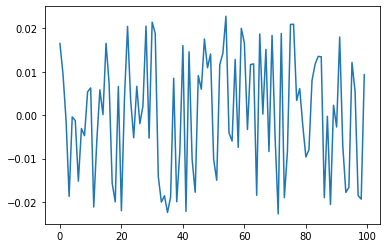

In [ ]:
plt.plot(init_velocity(1000,100))

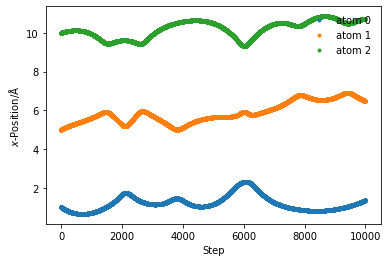

In [ ]:
def run_md(dt, number_of_steps, initial_temp, x):
    """
    Ejecuta una simulación de DM.
    
    Parámetros
    ----------
    dt: float
        La (s) longitud (s) del paso de tiempo
    número_de_pasos: int
        Número de iteraciones en la simulación
    initial_temp: float
        Temperatura del sistema a
        inicialización (K)
    x: ndarray de floats
        Las posiciones iniciales de las partículas en un
        dimensión única (Å)
       
    Devoluciones
    -------
    ndarray de floats
        Las posiciones de todas las partículas.
        a lo largo de la simulación (Å)
    """
    positions = np.zeros((number_of_steps, 3))
    v = init_velocity(initial_temp, 3)
    a = get_accelerations(x)
    for i in range(number_of_steps):
        x = update_pos(x, v, a, dt)
        a1 = get_accelerations(x)
        v = update_velo(v, a, a1, dt)
        a = np.array(a1)
        positions[i, :] = x
    return positions

x = np.array([1, 5, 10])
sim_pos = run_md(0.1, 10000, 300, x)
    
%matplotlib inline
for i in range(sim_pos.shape[1]):
    plt.plot(sim_pos[:, i], '.', label='atom {}'.format(i))

plt.xlabel(r'Step')
plt.ylabel(r'$x$-Position/Å')
plt.legend(frameon=False)
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: RuntimeWarning: overflow encountered in power
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:46: RuntimeWarning: overflow encountered in power


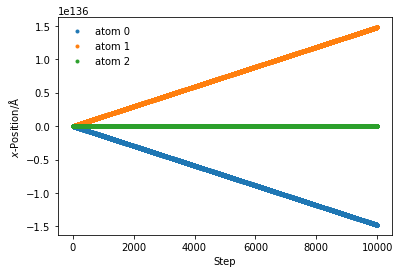

In [ ]:
x = np.array([1e-10, 2e-10, 1e-9])
sim_pos = run_md(0.1, 10000, 300, x)
    
%matplotlib inline
for i in range(sim_pos.shape[1]):
    plt.plot(sim_pos[:, i], '.', label='atom {}'.format(i))
plt.xlabel(r'Step')
plt.ylabel(r'$x$-Position/Å')
plt.legend(frameon=False)
plt.show()

## MD 2D

In [ ]:
def lattice_pos(npart,r):
    """
    Distribuye homogeneamente npart particulas en una celda
    de 1x1 entre 0 y 1, agregando un r/100% de aleatoriedad. 
    Devuelve un np.array de npart de posiciones x 2 coordenadas

    """

    #Calculo cantidad de celdas por lado
    n = int(np.ceil(np.sqrt(npart)))
    
    #calculo el centro de la celda
    nf = 1.0/float(n)
    
    #Calculo las posiciones de todas las celdas disponibles agregando un r% de randomizacion
    
    celdas = [[i*nf +0.5*nf + r*np.random.rand(),j*nf + 0.5*nf+ r*np.random.rand()]
              for i in range(n) for j in range(n)]
    
    #Mezclo las posiciones de las celdas
    np.random.shuffle(celdas)
    
    X = np.array(celdas[0:npart])
    return X

def vel_ini(npart,temp_red):
    """
    Asigna velocidades al azar de la distribucion uniforme en el rango -0.5 a 0.5

    """
    V = np.random.rand(npart,2)-0.5*np.ones((npart,2), dtype=np.float)
    
    #Calculamos la velocidad del centro de masa
    Vx = sum(V[:,0])/npart
    Vy = sum(V[:,1])/npart
    
    #Calculamos la velocidad cuadratica media
    V2 = sum(sum(V**2))/npart
    
    #Factor de escala para temperatura
    fs = np.sqrt(2*temp_red/V2)
    
    #Elimino la velocidad del centro de masa y escalo
    V[:,0] = (V[:,0] - Vx)*fs
    V[:,1] = (V[:,1] - Vy)*fs
    
    return V

def init(npart,box,temp_red,dt_red,sigma):
    """
    inicializa posiciones y velocidades usando lattice_pos y vel_ini

    """    
    r = 0.00
    X = lattice_pos(npart,r)
    
    #Escalo posiciones al tamanio de caja y lo reduzco con sigma
    X = (X*box)/sigma
    V = vel_ini(npart,temp_red) 
    
    return X,V

Función para calcular las fuerzas usando Lennard-Jones en condiciones periódicas

In [ ]:
def force(npart,X,rcut,box,epsilon):
    """
    Calcula las fuerzas de todas las particulas utilizando un potencial de Lennard-Jones.
    Las distancias ya estan reducidas por sigma y utiliza un radio de corte rcut.
    Las fuerzas son devueltas en unidades reducidas y las energias en kJ/mol

    """ 
    
    #inicializo las fuerzas a 0.0 y la energia a 0.0
    F = np.zeros((npart,2),dtype=np.float)
    Epot = 0.0
    
    #Calculo la energia de cutoff en unidades reducidas
    rci6 = 1.0/rcut**6
    rci12= rci6**2
    Ecut = 4.0*(rci12 -rci6)
    
    #Calculo la fuerza sobre todos los pares de particulas
    for i in range(npart-1):
        for j in range(i+1,npart):
            rx = X[i,0] - X[j,0]
            rx = rx - box*np.rint(rx/box)
            ry = X[i,1] - X[j,1]
            ry = ry - box*np.rint(ry/box)
            r2 = rx**2 + ry**2
            
            if r2 < rcut**2:
                r2i = 1/r2
                r6i = r2i**3
                ff = 48.0*r2i*r6i*(r6i-0.5)
                
                # F tiene unidades de reducidas
                F[i,0] = F[i,0] + ff*rx
                F[j,0] = F[j,0] - ff*rx

                F[i,1] = F[i,1] + ff*ry
                F[j,1] = F[j,1] - ff*ry

                Epot = Epot + 4.0*r6i*(r6i-1.0) - Ecut
                
    return [F,Epot*epsilon] #Fuerza en unidades reducidas y energia en kJ/mol


Funciones para calcular posiciones y velocidades usando velocity Verlet en condiciones periódicas

In [ ]:
def pos(npart,X,V,F,dt,box,m):
    """
    Calcula las nuevas posiciones usando el algoritmo de velocity Verlet.
    Todas las distancias están reducidas. Las nuevas posiciones son devueltas en 
    coordenadas reducidas.

    """ 
    
    Xnew = X + V*dt + (F/(2.0*m))*dt**2
    
    #Se fija si la partícula salió de la caja y la transporta a
    #la posición correspondiente de su imagen
    np.where(Xnew[:,0] > box, Xnew[:,0] - box, Xnew[:,0])
    np.where(Xnew[:,0] < 0.0, box + Xnew[:,0], Xnew[:,0])
    np.where(Xnew[:,1] > box, Xnew[:,1] - box, Xnew[:,1])
    np.where(Xnew[:,1] < 0.0, box + Xnew[:,1], Xnew[:,1])
    
    return Xnew

def vel(npart,V,F,Fnew,dt,m):
    """
    Calcula las nuevas velocidades usando el algoritmo de velocity Verlet.
    Las nuevas velocidades son devueltas en coordenadas reducidas y la energía
    cinética está en kJ/mol

    """ 
    Vnew = V + (0.5/m)*(Fnew + F)*dt
    
    V2 = sum(sum(Vnew**2))
    Ekin = 0.5*V2*epsilon
    
    return Vnew, Ekin

Función de inicialización de simulación que genera unidades reducidas y otros parámetros relevantes para simular, y función que genera una corrida (capaz de controlar la temperatura usando un termostato de Berendsen)

In [ ]:
def inicializar(npart, box, temperatura, dt, sigma, epsilon, masa):
    """
    Inicializa una simulación en función de la cantidad de partículas (npart),
    el tamaño de la caja en angstroms (box), una temperatura (K), el paso de simulación
    (dt) en segundos, los parámetros de Lennard-Jones sigma y epsilon (en A y kJ/mol)
    y la masa de la partícula (en g/mol). Devuelve coordenadas, velocidades y fuerzas iniciales en
    unidades reducidas y un diccionario con parámetros de la corrida (unit_red)

    """     
    NA = 6.02e23 # 1/mol
    kB = 1.381e-23 # J/K
    
    rcut = box/2.0 # A (unidades reales)
    
    #reduzco el tiempo
    t_unit = (sigma*1e-10) * np.sqrt(masa*1e-3/(1000*epsilon))
    dt_red = dt/t_unit

    #reduzco la temperatura
    temp_unit = 1.0/(kB/(1000*epsilon/NA))
    temp_red = temperatura/temp_unit

    #reduzco la masa
    m_unit = masa*1e-3/NA
    m = 1

    #Posiciones y Velocidad inicial
    X, V = init(npart,box,temp_red,dt_red,sigma)

    #Calculo fuerzas iniciales
    F,Epot = force(npart,X,rcut/sigma,box/sigma,epsilon)

    unit_red = {'t_unit': t_unit, 'T_unit': temp_unit, 'm_unit': m_unit, 'E_unit':epsilon, 'x_unit': sigma,
               'box': box/sigma, 'rcut':rcut/sigma, 'Temp0':temperatura, 'sigma':sigma, 'epsilon':epsilon,
                'dt':dt, 'm':m}
    
    return X, V, F, unit_red

def simular(nsteps, X, V, F, unit_red, tau_ber, plot_freq):
    """
    Corre una simulación nsteps pasos a partir de las coordenadas, velocidades
    y fuerzas iniciales. Si se provee un tau_ber > 0, utiliza un termostato de
    Berendsen para realizar una simulación a T constante (provista en los parámetros 
    de la corrida). plot_freq define cada cuantos pasos se grafica. Además de los gráficos
    de posición en función del paso, Temperatura y Energías, provee coordenadas, velocidades
    y fuerzas finales de la simulación.

    """   
    sigma = unit_red['sigma']
    epsilon = unit_red['epsilon']
    dt = unit_red['dt']/unit_red['t_unit']
    box = unit_red['box']
    temp0 = unit_red['Temp0']
    m = unit_red['m']
    rcut = unit_red['rcut']
    temp_unit = unit_red['T_unit']
    
    if plot_freq < nsteps:
        fig = plt.figure()
        ax1 = fig.add_subplot(2,2,1)
        ax2 = fig.add_subplot(2,2,3)
        ax3 = fig.add_subplot(2,2,2)
        fig.show()
        fig.canvas.draw()

    #inicializo
    E = np.zeros((nsteps,2))
    T = np.zeros((nsteps,1))
    
    if tau_ber > 0:
        berendsen = True
    else:
        berendsen = False

    for i in range(nsteps):
        #Calculo Posicion
        Xnew = pos(npart,X,V,F,dt,box,m)

        #Calculo Fuerzas nuevas
        Fnew, Epot = force(npart,Xnew,rcut,box,epsilon)
        E[i,0] = Epot
    
        #Calculo velocidad
        Vnew, Ekin = vel(npart,V,F,Fnew,dt,m)
        E[i,1] = Ekin
        T_i = sum(sum(Vnew**2))/(2*npart)*temp_unit 
        T[i] = T_i
    
        if berendsen:
            l = np.sqrt(1 + (dt/tau_ber)*(temp0/T_i - 1))
            Vnew = Vnew*l
    
        #Actualizo variables
        X = copy(Xnew)
        V = copy(Vnew)
        F = copy(Fnew)
    
        if (plot_freq < nsteps) and (i % plot_freq == 0):
            ax1.clear()
            ax1.plot(X[:,0]*sigma,X[:,1]*sigma,'b.')
    
            ax1.axis('equal')
            ax1.set_aspect('equal', 'box')
            ax1.set_xlim(0,box*sigma)
            ax1.set_ylim(0,box*sigma)
        
            ax2.clear()
            ax2.plot((E[0:i,0]+ E[0:i,1])/npart,'r', label = 'Total')
            ax2.plot(E[0:i,0]/npart,'g', label = 'Potencial')
            ax2.plot(E[0:i,1]/npart,'b', label = 'Cinetica')
            ax2.set_xlabel('#Paso')
            ax2.set_ylabel('E(kJ/mol)')
            ax2.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=3, fancybox=True, shadow=True)
        
            ax3.clear()
            ax3.plot(T[0:i],'r')
            ax3.plot((i+1)*[temp0],'k--')
            ax3.set_xlabel('#Paso')
            ax3.set_ylabel('T(K)')
        
            fig.canvas.draw()
            
    return X, V, F

Inicialización de parámetros y simulación. Termalización a 119.8K por 2000 pasos.

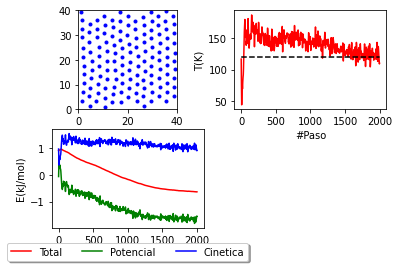

In [ ]:
nsteps = 2000
npart  =  144
box = 40
temperatura = 119.8 #K
dt = 1e-14 # en segundos 
sigma = 3.405 #A
epsilon = 0.996 #kJ/mol
masa = 39.95 #g/mol
tau_ber = 1
plot_freq = 1

#Inicializo con berendsen tau = 1 y corro 2000 pasos
X, V, F, unit_red = inicializar(npart, box, temperatura, dt, sigma, epsilon, masa)
X, V, F = simular(nsteps, X, V, F, unit_red, tau_ber, plot_freq)

In [ ]:
X

array([[ 3.41476256,  3.55892101],
       [ 7.77977385, 10.02122579],
       [ 7.78441857,  2.52250218],
       [ 6.14400644,  6.79405047],
       [ 0.49621814,  2.04851067],
       [11.38617525,  7.90617039],
       [ 9.57180132,  1.54121804],
       [ 3.96313974, 10.62624572],
       [ 9.6033336 ,  5.82787875],
       [ 8.69895636,  6.23662231],
       [ 4.99490228, 11.60793003],
       [ 3.3991889 ,  6.94229027],
       [ 1.41831718,  2.53933425],
       [ 2.44864947,  5.18243501],
       [10.42972011,  0.96574711],
       [ 2.1693456 , 10.5799628 ],
       [ 9.60699971,  8.96195972],
       [ 2.22128621,  9.54591802],
       [ 1.64659931,  5.70846382],
       [ 4.02204525, -0.17928067],
       [ 8.64423297,  9.47374537],
       [ 4.90137322, 10.49258144],
       [ 1.23842691,  7.95633782],
       [ 8.6609375 ,  3.09634371],
       [10.46994325,  9.53902317],
       [-0.40264729,  0.55660098],
       [ 6.88657109,  7.43887141],
       [ 5.02359147,  0.90615798],
       [ 1.32394316,

Testeo eliminar el termostato. Corrida de otros 2000 pasos.

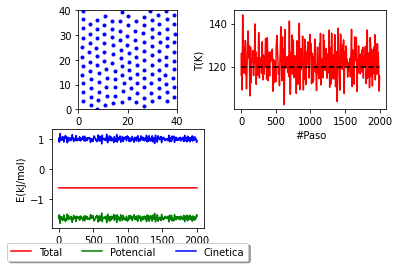

In [ ]:
#Pongo berendsen tau = 0 y corro 2000 pasos
nsteps = 2000
tau_ber = 0
X, V, F = simular(nsteps, X, V, F, unit_red, tau_ber, plot_freq)
V120 = copy(V)

Cambio la T a 200K y pongo el termostato.

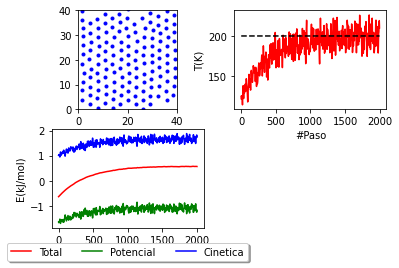

In [ ]:
#Cambio la temperatura del sistema a T = 200K, pongo un berendsen y corro 2000 pasos
unit_red['Temp0'] = 200
tau_ber = 1.0
nsteps = 2000
X, V, F = simular(nsteps, X, V, F, unit_red, tau_ber, plot_freq)

Elimino el termostato y chequeo que la T se mantiene.

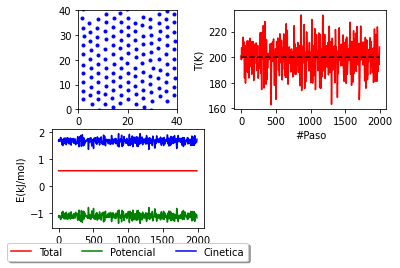

In [ ]:
#Pongo berendsen tau = 0 y corro 2000 pasos
nsteps = 2000
tau_ber = 0
plot_freq = 10
X, V, F = simular(nsteps, X, V, F, unit_red, tau_ber, plot_freq)
V200 = copy(V)

Enfrio el sistema a 50K usando el Berendsen.

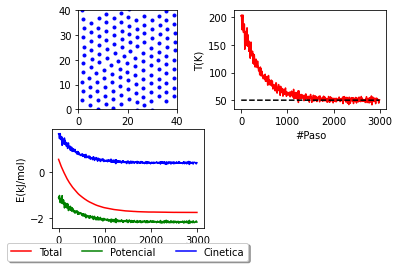

In [ ]:
#Cambio la temperatura del sistema a T = 50K, pongo un berendsen y corro 1000 pasos
unit_red['Temp0'] = 50
tau_ber = 1.0
nsteps = 3000
X, V, F = simular(nsteps, X, V, F, unit_red, tau_ber, plot_freq)

Elimino el Berendsen y veo la dinámica.

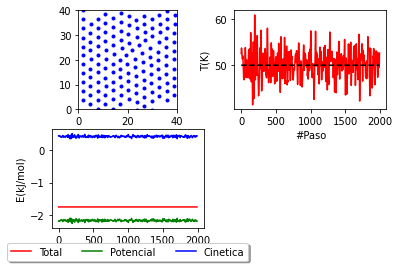

In [ ]:
#Pongo berendsen tau = 0 y corro 2000 pasos
nsteps = 2000
tau_ber = 0
plot_freq = 10
X, V, F = simular(nsteps, X, V, F, unit_red, tau_ber, plot_freq)
V50 = copy(V)

Grafico histogramas de las velocidades a las distintas temperaturas para los sistemas termalizados pero sin termostato.

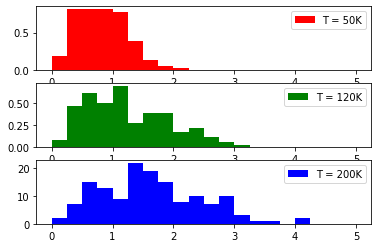

In [ ]:
fig = plt.figure()
ax1 = fig.add_subplot(3,1,1)
ax2 = fig.add_subplot(3,1,2)
ax3 = fig.add_subplot(3,1,3)
ax1.hist(np.sqrt(np.sum(V50**2, axis=1)), range = (0.0, 5.0), bins = 20, label= 'T = 50K', color = 'r', density=True)
ax1.legend()
ax2.hist(np.sqrt(np.sum(V120**2, axis=1)), range = (0.0, 5.0), bins = 20, label= 'T = 120K', color = 'g', density=True)
ax2.legend()
ax3.hist(np.sqrt(np.sum(V200**2, axis=1)), range = (0.0, 5.0), bins = 20, label= 'T = 200K', color = 'b')
ax3.legend()
plt.show()

Para aumentar la estádistica de los histogramas, termalizo y manteniendo el termostato realizo 10 simulaciones de 500 pasos, guardando las velocidades de las partículas. Asumo que en 500 pasos las velocidades están descorrelacionadas y por lo tanto es como muestrear independientemente las velocidades.

0
1
2
3
4
5
6
7
8
9


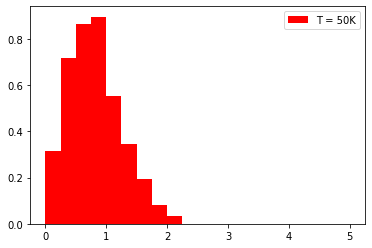

In [ ]:
V50_x10 = []
nsim = 10
for i in range(nsim):
    print(i)
    nsteps = 500
    tau_ber = 1.0
    unit_red['Temp0'] = 50
    plot_freq = 1000
    X, V, F = simular(nsteps, X, V, F, unit_red, tau_ber, plot_freq)
    V50_x10.append(np.sqrt(np.sum(V**2, axis=1)))
V50_x10 = np.array(V50_x10)
V50_x10 = V50_x10.reshape(npart*nsim,1)
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
ax1.hist(V50_x10, range = (0.0, 5.0), bins = 20, label= 'T = 50K', color = 'r', density = True)
ax1.legend()
plt.show()

Repito a 100K

In [ ]:
nsteps = 2000
tau_ber = 1.0
unit_red['Temp0'] = 100
plot_freq = 100
X, V, F = simular(nsteps, X, V, F, unit_red, tau_ber, plot_freq)

V100_x10 = []
nsim = 10
for i in range(nsim):
    print(i)
    nsteps = 500
    tau_ber = 1.0
    unit_red['Temp0'] = 100
    plot_freq = 1000
    X, V, F = simular(nsteps, X, V, F, unit_red, tau_ber, plot_freq)
    V100_x10.append(np.sqrt(np.sum(V**2, axis=1)))
V100_x10 = np.array(V100_x10)
V100_x10 = V100_x10.reshape(npart*nsim,1)
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
ax1.hist(V100_x10, range = (0.0, 5.0), bins = 20, label= 'T = 100K', color = 'r', density = True)
ax1.legend()
plt.show()

Repito a 200K

In [ ]:
nsteps = 2000
tau_ber = 1.0
unit_red['Temp0'] = 200
plot_freq = 100
X, V, F = simular(nsteps, X, V, F, unit_red, tau_ber, plot_freq)

V200_x10 = []
nsim = 10
for i in range(nsim):
    print(i)
    nsteps = 500
    tau_ber = 1.0
    unit_red['Temp0'] = 200
    plot_freq = 1000
    X, V, F = simular(nsteps, X, V, F, unit_red, tau_ber, plot_freq)
    V200_x10.append(np.sqrt(np.sum(V**2, axis=1)))
V200_x10 = np.array(V200_x10)
V200_x10 = V200_x10.reshape(npart*nsim,1)
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
ax1.hist(V200_x10, range = (0.0, 5.0), bins = 20, label= 'T = 200K', color = 'r', density = True)
ax1.legend()
plt.show()

Repito a 400K!

In [ ]:
nsteps = 2000
tau_ber = 1.0
unit_red['Temp0'] = 400
plot_freq = 100
X, V, F = simular(nsteps, X, V, F, unit_red, tau_ber, plot_freq)

V400_x10 = []
nsim = 10
for i in range(nsim):
    print(i)
    nsteps = 500
    tau_ber = 1.0
    unit_red['Temp0'] = 400
    plot_freq = 1000
    X, V, F = simular(nsteps, X, V, F, unit_red, tau_ber, plot_freq)
    V400_x10.append(np.sqrt(np.sum(V**2, axis=1)))
V400_x10 = np.array(V400_x10)
V400_x10 = V400_x10.reshape(npart*nsim,1)
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
ax1.hist(V400_x10, range = (0.0, 5.0), bins = 20, label= 'T = 400K', color = 'r', density = True)
ax1.legend()
plt.show()

Grafico todos los histogramas juntos... Boltzman!

In [ ]:
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
ax1.hist(V400_x10, range = (0.0, 6.0), bins = 25, label= 'T = 400K', color = 'k', alpha = 0.85, density=True)
ax1.hist(V200_x10, range = (0.0, 6.0), bins = 25, label= 'T = 200K', color = 'b', alpha = 0.85, density=True)
ax1.hist(V100_x10, range = (0.0, 6.0), bins = 25, label= 'T = 100K', color = 'g', alpha = 0.85, density=True)
ax1.hist(V50_x10, range = (0.0, 6.0), bins = 25, label= 'T = 50K', color = 'r', alpha = 0.85, density=True)
ax1.legend()
plt.show()

## MD 3D

In [ ]:
# Data Handling libraries
import numpy as np
import pandas as pd
import scipy.spatial as sc_p

# Plot libraries
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import mpl_toolkits.mplot3d.axes3d as p3
import matplotlib.animation as animation

In [ ]:
# Plotting format
#plt.rcParams['font.serif'] = ['Times New Roman']
plt.rcParams.update({'mathtext.default':  'regular' })
sns.set(context='paper',style="whitegrid",font='Times New Roman',font_scale=1.2)

In [ ]:
#Metaconstantes
N = 64 #número de partículas
NL = 4 #Número de partículas por lado
#L = 10.0 #box longitude (angstroms)


Nt = 6000 #Número de pasos de tiempo


T_INF = 10000.0 #Temperatura deseada
dt = 0.001 #tamaño de paso 10**(12) segundos
m = 39.948 # Masa del Argón (umas)

# $t_n=n*\tau$
tao = 10
Tao = tao*dt


# Constante de Boltzmann:
KB = 1.3806E-23/1.66E-23
sigma = 3.405 #A
#$r_{min}=2^{1/6}\sigma$
#$(r_min^3 *N) ^(1/3)=(r_min *N^(1/3))$
Lp = ((2**(1/6)*sigma)**3*N)**(1/3)
L = Lp

**meshgrid**

In [ ]:
x = np.arange(-5, 5, 0.1)
y = np.arange(-5, 5, 0.1)
xx, yy = np.meshgrid(x, y, sparse=True)
z = np.sin(xx**2 + yy**2) / (xx**2 + yy**2)
plt.contourf(x,y,z)
plt.show()

In [ ]:
x = np.zeros(5)
y = np.zeros(10)
z = np.zeros(15)
arrays = np.meshgrid(x, y,z, sparse=True)


<p align="center">
  <img src="https://i.stack.imgur.com/8Mbig.png"  width=55% />
</p>

[StackOverflow](https://stackoverflow.com/questions/36013063/what-is-the-purpose-of-meshgrid-in-python-numpy)

In [ ]:
xvalues = np.array([0, 1, 2, 3, 4])
yvalues = np.array([0, 1, 2, 3, 4])

xx, yy = np.meshgrid(xvalues, yvalues)

plt.plot(xx, yy, marker='.', color='k', linestyle='none')

In [ ]:
#Initial conditions
def initial_conditions(N,L):
    #Arreglo de velocidades de las partículas:
    #número de partículas por lado como dimensión 
    v1 = np.zeros(NL)
    v2 = np.zeros(NL)
    v3 = np.zeros(NL)
    #
    vel = np.array(np.meshgrid(v1,v2,v3))
                   
    #Organization of particles:
    c1 = np.arange(0+L/(NL+1), L, L/(NL+1))
    c2 = np.arange(0+L/(NL+1), L, L/(NL+1))
    c3 = np.arange(0+L/(NL+1), L, L/(NL+1))
    pos = np.array(np.meshgrid(c1,c2,c3))

    # Track conditions
    r = {'x':pos[2].flatten().reshape((1,N)),'y':pos[0].flatten().reshape((1,N)),'z':pos[1].flatten().reshape((1,N))}
    v = {'x':vel[2].flatten().reshape((1,N)),'y':vel[0].flatten().reshape((1,N)),'z':vel[1].flatten().reshape((1,N))}
    return r, v

# Energía Potencial de Lennard-Jones 
def U_pot(r):
    sigma = 3.4 #es la distancia en la que el potencial entre partículas es cero
    epsilon = 99.3975903614458 #Profundidad del potencial
    return 4*epsilon*((sigma/r)**12-(sigma/r)**6)

# Fuerza de L-J:
def calc_force(r):
    sigma = 3.4
    epsilon = 99.3975903614458 #1.65E-21 / 1.66E-23
    return -24.0*epsilon/(sigma**2)*(sigma/r)**8*(2*(sigma/r)**6-1.0)

# Determine the minkowsky distance 1
def minkowski_distance1(x,y):
    x = np.asarray(x)
    y = np.asarray(y)
    return np.sum(y-x,axis=-1)

# Obtain the relative position
def relative_position(x,y):
    m,k = x.shape
    n,l = y.shape
    result = np.empty((m,n),dtype=float)
    for i in range(m):
        result[i,:] = minkowski_distance1(x[i],y)
    return result

In [ ]:
%%time
# Generate the initial conditions
r, v = initial_conditions(N,L)

# Declare empty arrays to have information
K = []
U = []
TOT = []
T = [0]
V = [np.zeros(N)]

# Obtain the particles positions:
Rx=[r['x'].reshape(N,)]
Ry=[r['y'].reshape(N,)]
Rz=[r['z'].reshape(N,)]

# Values for the boundaries conditions
values = np.array([-L,0,L])

# Useful variable names for positions
letters = ['x','y','z']


for t in range(1,Nt+1):
    
    # Append the time for each vector. 
    T.append(t)
    
    # Obtain the particles boundaries conditions (including centered ones):
    boundaries = np.array([[r[elem]+i for  i in values]for elem in letters])
    
    # In x, y, and z
    bx = boundaries[0]
    by = boundaries[1]
    bz = boundaries[2]
    
    # Obtain the x, y and z components for each particle
    B = []
    for i in range(3):
        for j in range(3):
            for k in range(3):
                B.append([bx[k],by[j],bz[i]])
    B=np.array(B)
    
    # Determine the positions of all the particles
    all_particles = np.split(np.array([B[:,:,0,i] for i in range(N)]).flatten(),27*N)
    
    #Obtain a numpy array with the principal positions
    rtot = np.array([r['x'],r['y'],r['z']])

    # Search for the x,y, and z position for each particle
    xyz_pos = np.array([rtot[:,:,i] for i in range(N)]).reshape((N,3))

    # Obtain a single vector that has the x, y and z components individually
    x_pos = r['x'].reshape((N,1))
    y_pos = r['y'].reshape((N,1))
    z_pos = r['z'].reshape((N,1))
    
    # Obtain the distances of all the particles with each other
    distances = sc_p.distance_matrix(xyz_pos,all_particles, p=2)
    
    #Since it is a distance matrix, the value where the distance is 0 should be changed to NAN
    distances = np.where(distances==0,np.nan,distances)
    
    # Determine the force of each interaction depending on the distance, if the distance is 0
    # then, the value will be Nan, so it is not affected somehow.
    forces = np.nan_to_num(calc_force(distances))
    
    # Obtain the components for all the particles
    x_all = np.array(all_particles)[:,0].reshape(N*27,1)
    y_all = np.array(all_particles)[:,1].reshape(N*27,1)
    z_all = np.array(all_particles)[:,2].reshape(N*27,1)

    # Generate distance matrices with relative position Rj-Ri
    x_pos1 = relative_position(x_pos,x_all)
    y_pos1 = relative_position(y_pos,y_all)
    z_pos1 = relative_position(z_pos,z_all)

    # Determine how much the force will affect each particle movement
    f = {'x':np.sum(forces*x_pos1,axis=1),'y':np.sum(forces*y_pos1,axis=1),'z':np.sum(forces*z_pos1, axis=1)}
    
    #Kinetic energy
    KE = .5*m*np.sum(v['x']**2+v['y']**2+v['z']**2)
    K.append(KE)
    
    #Potential energy
    PE = 0.5*np.sum(np.nan_to_num(U_pot(distances)))
    U.append(PE)
    
    #Total Energy
    TOT.append(KE + PE)
    
    # Change each velocity correspondingly
    v['x'] = v['x'] + f['x']/m*dt
    v['y'] = v['y'] + f['y']/m*dt
    v['z'] = v['z'] + f['z']/m*dt
    
    # Apply the thermostat to modify the velocity
    if t%tao==0:
        T_t = 2.0*KE/(3.0*N*KB)
        Lamb = np.sqrt(1.0 + dt/Tao*(T_INF/T_t-1))
        v['x'] = Lamb*v['x']
        v['y'] = Lamb*v['y']
        v['z'] = Lamb*v['z']

    #Change each position correspondingly
    r['x'] = r['x'] + v['x']*dt + .5*f['x']/m*dt**2
    r['y'] = r['y'] + v['y']*dt + .5*f['y']/m*dt**2
    r['z'] = r['z'] + v['z']*dt + .5*f['z']/m*dt**2
    
    #Boundary conditions (most time consuming section)
    r['x'] = np.where(r['x'] < 0, r['x'] + L, r['x'] )
    r['x'] = np.where(r['x'] > L, r['x'] - L, r['x'] )
    r['y'] = np.where(r['y'] < 0, r['y'] + L, r['y'] )
    r['y'] = np.where(r['y'] > L, r['y'] - L, r['y'] )
    r['z'] = np.where(r['z'] < 0, r['z'] + L, r['z'] )
    r['z'] = np.where(r['z'] > L, r['z'] - L, r['z'] )

    # Append the values for the velocity (as magnitude)
    V.append(v['x']**2+v['y']**2+v['z']**2)
    
    # Append the values for the Positions for each particle
    Rx.append(r['x'].reshape(N,))
    Ry.append(r['y'].reshape(N,))
    Rz.append(r['z'].reshape(N,))

In [ ]:
#Results (positions)
x_df = pd.DataFrame(Rx,columns=[f"p{i+1}" for i in range(N)])
y_df = pd.DataFrame(Ry,columns=[f"p{i+1}" for i in range(N)])
z_df = pd.DataFrame(Rz,columns=[f"p{i+1}" for i in range(N)])

# Results (step time, potential energy, kinetic energy, total energy)
res = pd.DataFrame({'t':T[:Nt-1],'u':U[:Nt-1],'k':K[:Nt-1],'tot':TOT[:Nt-1]})

# Reduce the datasets size each "print_time"
print_time = 10
x_df = x_df[x_df.index % print_time == 0]
y_df = y_df[y_df.index % print_time == 0]
z_df = z_df[z_df.index % print_time == 0]
res = res[res.index % print_time == 0]


In [ ]:
x_df.head()

In [ ]:
%matplotlib notebook
%matplotlib notebook

COLOR=V[0]

# Plot 3d scatter graph:
plt.close('all')
fig = plt.figure(figsize=(10,6))
ax1 = fig.add_subplot(121,projection='3d')
plot1 = ax1.scatter(x_df.iloc[0],y_df.iloc[0],z_df.iloc[0], c=COLOR, s=10)
ax1.set_title('Argon particle movement')
ax1.set_xlim3d([0.0, L])
ax1.set_xlabel('X')
ax1.set_ylim3d([0.0, L])
ax1.set_ylabel('Y')
ax1.set_zlim3d([0.0, L])
ax1.set_zlabel('Z')

ax1.view_init(15)
ax1.xaxis.pane.fill = False
ax1.yaxis.pane.fill = False
ax1.zaxis.pane.fill = False
ax1.xaxis.pane.set_edgecolor('w')
ax1.yaxis.pane.set_edgecolor('w')
ax1.zaxis.pane.set_edgecolor('w')



# Plot 2d graphs

# Kinetic energy plot
ax2 = fig.add_subplot(333)
sc2, = ax2.plot([],[], label = 'Kinetic Energy', c = 'r', linewidth=0.4)
ax2.grid()
ax2.ticklabel_format(scilimits=(3,3),useMathText=True)
ax2.set_title('Kinetic Energy')
ax2.set_xlim([0.0, max(T)])
ax2.set_ylim([min(U)-100000, max(K)+100000])
ax2.set_ylabel('Energy')
plt.xticks([])

# Potential energy plot
ax3 = fig.add_subplot(336)
sc3, = ax3.plot([],[], label = 'Potential Energy', c = 'b', linewidth=0.4)
ax3.ticklabel_format(scilimits=(3,3),useMathText=True)
ax3.set_title('Potential Energy', c='b')
ax3.set_xlim([0.0, max(T)])
ax3.set_ylim([min(U)-100000, max(K)+100000])
ax3.set_ylabel('Energy')
ax3.grid()
plt.xticks([])

# Total energy plot 
ax4 = fig.add_subplot(339)
sc4, = ax4.plot([],[], label = 'Total Energy', c = 'g',linewidth=0.4)
ax4.grid()
ax4.ticklabel_format(scilimits=(3,3),useMathText=True)
ax4.set_title('Total Energy', c='g')
ax4.set_xlim([0.0, max(T)])
ax4.set_xlabel('Time Step')
ax4.set_ylim([min(U)-100000, max(K)+100000])
ax4.set_ylabel('Energy')



# Animation function
def animate(i):
    #ax1.view_init(20,i)
    sc2.set_data(res.t[0:i], res.k[0:i])
    sc3.set_data(res.t[0:i], res.u[0:i])
    sc4.set_data(res.t[0:i], res.tot[0:i])
    plot1._offsets3d = (x_df.iloc[i],y_df.iloc[i],z_df.iloc[i])
    plot1._facecolors = V[i]
    
ani = animation.FuncAnimation(fig, animate,interval =30 ,frames=len(x_df), repeat=False)
plt.show()

In [ ]:
ani

In [ ]:
from matplotlib import rc

rc('animation', html='jshtml')

In [ ]:
Writer = animation.writers['ffmpeg']
writer = Writer(fps=15, metadata=dict(artist='Me'), bitrate=1800)
ani.save('im.mp4', writer=writer)

## 5. Conclusiones

*   La dinámica molecular (MD) es una poderosa técnica de simulación. Sin embargo, para aplicar MD a simulaciones prácticas (por ejemplo, de sistemas reales), hay que tener en cuenta otras consideraciones.
*   No se puede subestimar la importancia de la estructura inicial. Por ejemplo, si la estructura inicial no es representativa de la estructura de equilibrio, puede pasar mucho tiempo antes de que se obtenga la estructura de equilibrio, posiblemente mucho más de lo que se puede simular razonablemente.
Ventajas:
*  Proporciona (en principio) un conocimiento completo del sistema; si todas las trayectorias son conocidas, todo se puede calcular.
*  Acomoda fácilmente estados de no equilibrio y otros
situaciones complejas más allá del equilibrio térmico (por
preparar las condiciones iniciales adecuadas)
* El conocimiento completo de todas las trayectorias es a menudo mucha más información de la necesaria (por ejemplo, estado de equilibrio de un fluido se caracteriza por solo dos variables, p y T)


## 6. Recursos útiles

* Martínez, L.; Andrade, R.; Birgin, E. G.; Martínez, J. M. J., Packmol: A Package for Building Initial Configurations
for Molecular Dynamics Simulations. Comput. Chem. 2009, 30 (13), 2157–2164. 10.1002/jcc.21224.
* ["Molecular Dynamics tutorial"](https://pythoninchemistry.org/sim_and_scat/molecular_dynamics/intro#References) Python in Chemistry. (English version)
* ["Dinámica Molecular"](https://es.wikipedia.org/wiki/Dinámica_molecular)
* Eric Ayars , 'Computational Physics with Python" (libro completo [aquí](https://belglas.files.wordpress.com/2018/03/cpwp.pdf))
* ["How to Think Like a Computer Scientist"](https://nbviewer.jupyter.org/github/Yorko/mlcourse.ai/blob/master/jupyter_english/tutorials/merging_dataframes_tutorial_max_palko.ipynb) - Think Python Versión 2.0.17 by Allen Doney. (libro completo [aquí](https://www.greenteapress.com/thinkpython/thinkpython.pdf))


## 7. Donaciones
<br>
<center>
Puedes donar una vez en el siguiente enlace (Ko-Fi):

<br>
    
*Click en la imagen.*

<a href="https://ko-fi.com/rcrdphysics">
<img src="https://habrastorage.org/webt/8r/ml/xf/8rmlxfpdzukegpxa62cxlfvgkqe.png" width=20% />

</center>